# Concrete Strength Prediction - Regression Analysis

## Project Overview
This notebook implements multiple regression models to predict concrete compressive strength based on mixture components and age.

## Motivation

### Why Concrete Strength Prediction Matters?

Concrete is one of the most important materials in construction and infrastructure development worldwide:

**1. Structural Safety and Reliability**
- **Building Safety:** Accurate strength prediction ensures structures can safely support intended loads
- **Risk Mitigation:** Prevent catastrophic failures in buildings, bridges, and infrastructure
- **Compliance:** Meet building codes and safety regulations
- **Quality Assurance:** Verify that concrete meets specified strength requirements

**2. Economic Benefits**
- **Cost Optimization:** Optimize mixture design to reduce material costs while maintaining quality
- **Material Efficiency:** Use appropriate amounts of expensive materials like cement
- **Reduced Waste:** Minimize over-design and material waste
- **Time Savings:** Speed up quality control processes with predictive models

**3. Environmental Impact**
- **Cement Reduction:** Lower cement content reduces CO2 emissions (cement production accounts for 8% of global CO2)
- **Sustainability:** Use alternative materials like blast furnace slag and fly ash effectively
- **Resource Conservation:** Optimize use of natural resources
- **Carbon Footprint:** Reduce environmental impact of construction projects

**4. Quality Control and Testing**
- **Fast Predictions:** Get strength estimates without waiting 28 days for traditional testing
- **Mixture Optimization:** Design optimal concrete mixtures for specific applications
- **Process Control:** Monitor and adjust production in real-time
- **Consistency:** Ensure uniform quality across batches

**5. Research and Development**
- **New Mixtures:** Develop innovative concrete formulations
- **Performance Prediction:** Understand how different components affect strength
- **Material Science:** Advance understanding of concrete behavior
- **Innovation:** Support development of high-performance concrete

### Problem Definition

**Objective:** Predict concrete compressive strength (MPa) based on mixture composition and age

**Input Features (8 Variables):**
- **Cement (kg/m³):** Primary binding material
- **Blast Furnace Slag (kg/m³):** Industrial by-product, cement replacement
- **Fly Ash (kg/m³):** Coal combustion by-product, improves workability
- **Water (kg/m³):** Activates cement hydration
- **Superplasticizer (kg/m³):** Chemical admixture for workability
- **Coarse Aggregate (kg/m³):** Gravel or crushed stone
- **Fine Aggregate (kg/m³):** Sand
- **Age (days):** Curing time, critical for strength development

**Target Variable:**
- **Compressive Strength (MPa):** Maximum load concrete can withstand

**Why This Analysis Matters:**

This predictive model enables:
- **Engineers:** Design concrete mixtures meeting specific strength requirements
- **Construction Companies:** Optimize material costs while ensuring quality
- **Quality Control Labs:** Predict strength without lengthy testing periods
- **Researchers:** Understand relationships between mixture components and strength
- **Environmental Scientists:** Develop more sustainable concrete formulations

**Key Relationships to Explore:**
- How does cement content affect strength?
- What is the optimal water-to-cement ratio?
- How do supplementary materials (slag, fly ash) influence performance?
- How does strength develop over time (age factor)?

By accurately predicting concrete compressive strength, we can create safer structures, reduce costs, minimize environmental impact, and advance concrete technology for sustainable construction.

---

## Dataset Description

**Dataset Name:** Concrete Compressive Strength Dataset

**Source:** UCI Machine Learning Repository

**Number of Samples:** 1,030 instances

**Number of Features:** 8 input variables + 1 target variable

### Feature Details:

| Variable Name | Role | Type | Description | Units | Range | Missing Values |
|---------------|------|------|-------------|-------|-------|----------------|
| Cement | Feature | Continuous | Portland cement component | kg/m³ | 102-540 | No |
| Blast Furnace Slag | Feature | Continuous | Ground granulated blast furnace slag (GGBFS) | kg/m³ | 0-359.4 | No |
| Fly Ash | Feature | Continuous | Coal combustion residue | kg/m³ | 0-200.1 | No |
| Water | Feature | Continuous | Mixing water | kg/m³ | 121.8-247 | No |
| Superplasticizer | Feature | Continuous | High-range water reducer | kg/m³ | 0-32.2 | No |
| Coarse Aggregate | Feature | Continuous | Gravel component | kg/m³ | 801-1145 | No |
| Fine Aggregate | Feature | Continuous | Sand component | kg/m³ | 594-992.6 | No |
| Age | Feature | Integer | Concrete age | days | 1-365 | No |
| **Compressive Strength** | **Target** | **Continuous** | **Concrete compressive strength** | **MPa** | **2.33-82.6** | **No** |

### Dataset Characteristics:
- **Complete Dataset:** No missing values
- **Real-world Data:** Actual laboratory test results
- **Diverse Mixtures:** Wide variety of concrete mix designs
- **Time Component:** Age ranges from 1 to 365 days (strength development over time)
- **Quality:** High-quality experimental data from civil engineering research

### Key Statistics:
- **Mean Strength:** ~35.8 MPa
- **Standard Deviation:** ~16.7 MPa
- **Minimum Strength:** 2.33 MPa (very early age or poor mixture)
- **Maximum Strength:** 82.6 MPa (high-performance concrete)

### Application Areas:
- Structural concrete design
- Quality control in concrete production
- Research on sustainable concrete materials
- Development of high-performance concrete mixtures

## 1. Import Libraries and Load Data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv(r'../data_set/Concrete_Data.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (1030, 10)

First few rows:
   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

    Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0        
1                                                0.0        
2                                              142.5        
3                                              142.5        
4                                              132.4        

    Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   



## 2. Data Preprocessing

In [21]:
df = df.dropna(axis=1, how='all')

df.columns = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 
              'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 
              'Age', 'Strength']

print("Column Names:", df.columns.tolist())
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

X = df.drop('Strength', axis=1)
y = df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Column Names: ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength']

Missing Values:
Cement                0
Blast_Furnace_Slag    0
Fly_Ash               0
Water                 0
Superplasticizer      0
Coarse_Aggregate      0
Fine_Aggregate        0
Age                   0
Strength              0
dtype: int64

Number of duplicate rows: 25

Training set size: 824 samples
Testing set size: 206 samples


## 3. Build Multiple Regression Models

In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
}

trained_models = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    trained_models[name] = model
    predictions[name] = y_pred

## 4. Model Evaluation - Regression Metrics

In [23]:
results = []

for name, y_pred in predictions.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    n = len(y_test)
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Adjusted R²': adj_r2,
        'MAPE (%)': mape
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('R²', ascending=False).reset_index(drop=True)

print("=" * 100)
print("MODEL EVALUATION METRICS")
print("=" * 100)
print(results_df.to_string(index=False))
print("=" * 100)

MODEL EVALUATION METRICS
            Model      MAE       MSE     RMSE       R²  Adjusted R²  MAPE (%)
 Ridge Regression 7.751967 95.965107 9.796178 0.627576     0.612452 29.338857
Linear Regression 7.745559 95.970940 9.796476 0.627553     0.612428 29.273485
 Lasso Regression 7.823134 96.413078 9.819016 0.625837     0.610643 29.960925
       ElasticNet 8.023006 98.771554 9.938388 0.616684     0.601118 31.439706


## 5. Performance Comparison Visualization

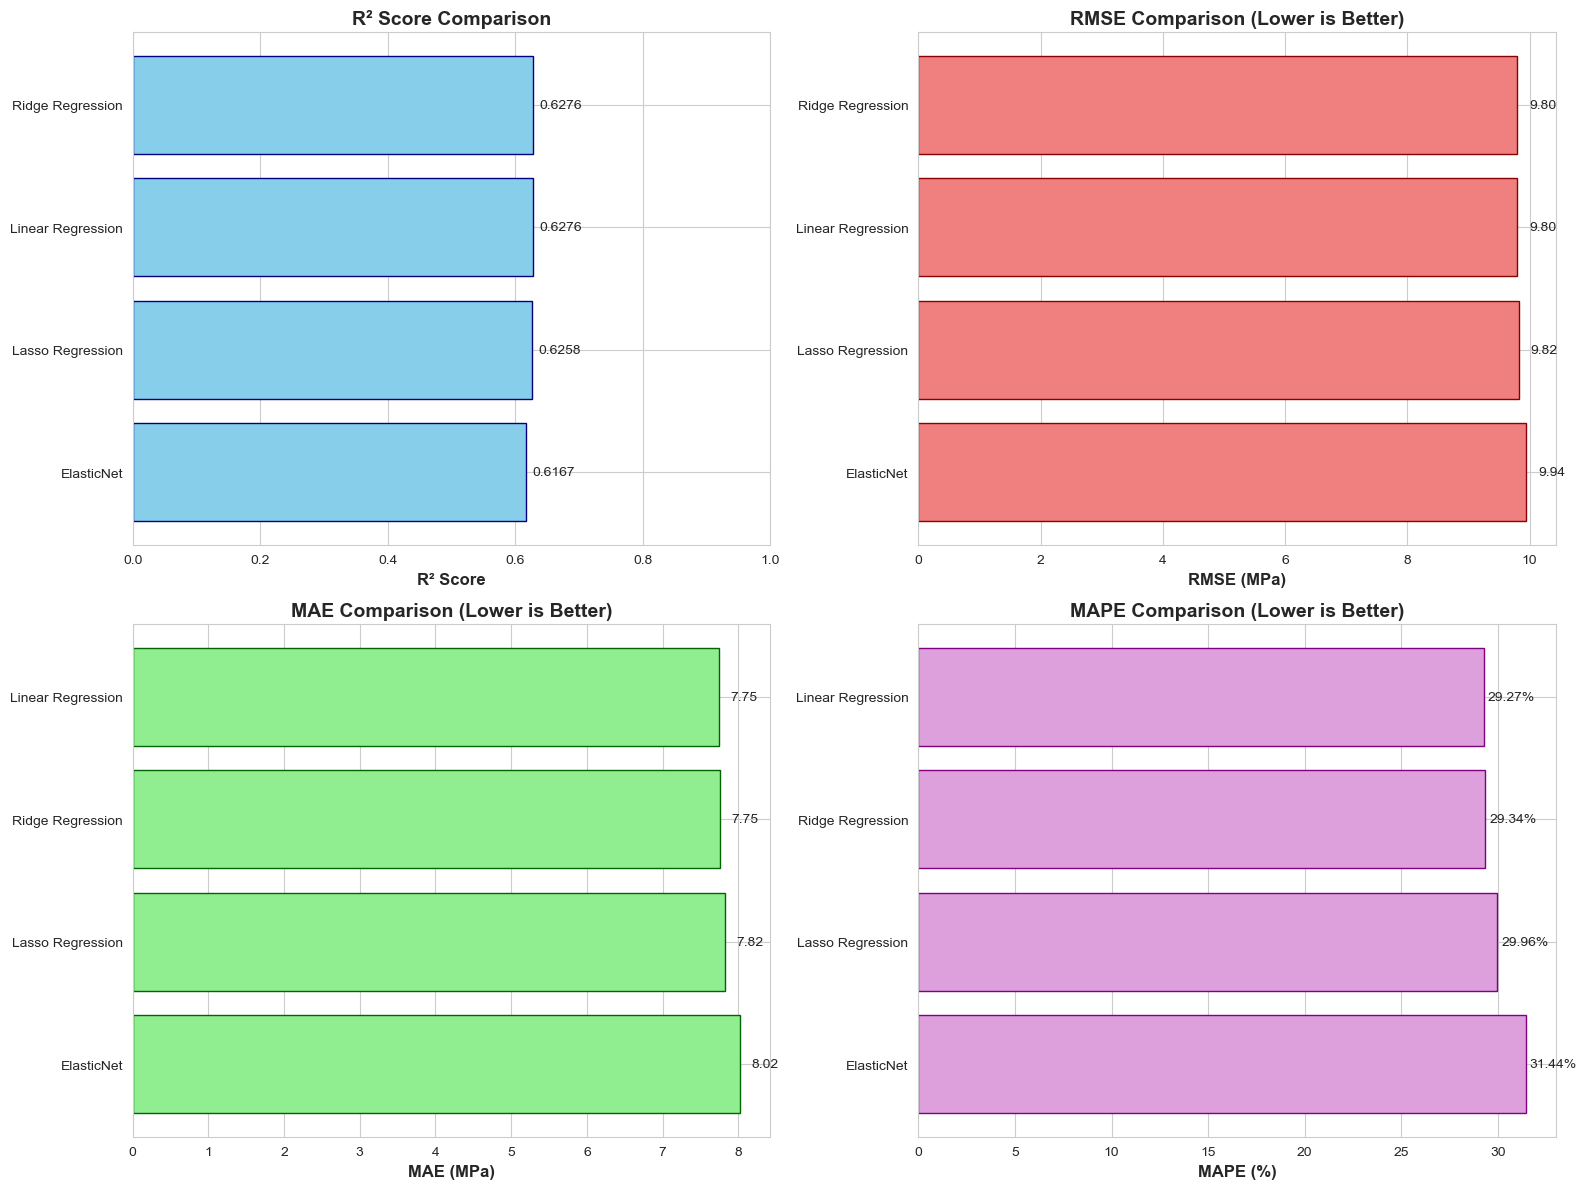

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
sorted_r2 = results_df.sort_values('R²')
bars1 = ax1.barh(sorted_r2['Model'], sorted_r2['R²'], color='skyblue', edgecolor='navy')
ax1.set_xlabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('R² Score Comparison', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 1)
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=10)

ax2 = axes[0, 1]
sorted_rmse = results_df.sort_values('RMSE', ascending=False)
bars2 = ax2.barh(sorted_rmse['Model'], sorted_rmse['RMSE'], color='lightcoral', edgecolor='darkred')
ax2.set_xlabel('RMSE (MPa)', fontsize=12, fontweight='bold')
ax2.set_title('RMSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', ha='left', va='center', fontsize=10)

ax3 = axes[1, 0]
sorted_mae = results_df.sort_values('MAE', ascending=False)
bars3 = ax3.barh(sorted_mae['Model'], sorted_mae['MAE'], color='lightgreen', edgecolor='darkgreen')
ax3.set_xlabel('MAE (MPa)', fontsize=12, fontweight='bold')
ax3.set_title('MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width + 0.15, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', ha='left', va='center', fontsize=10)

ax4 = axes[1, 1]
sorted_mape = results_df.sort_values('MAPE (%)', ascending=False)
bars4 = ax4.barh(sorted_mape['Model'], sorted_mape['MAPE (%)'], color='plum', edgecolor='purple')
ax4.set_xlabel('MAPE (%)', fontsize=12, fontweight='bold')
ax4.set_title('MAPE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
for i, bar in enumerate(bars4):
    width = bar.get_width()
    ax4.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}%', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

best_model_name = results_df.iloc[0]['Model']

## 6. Predicted vs Actual Values Visualization

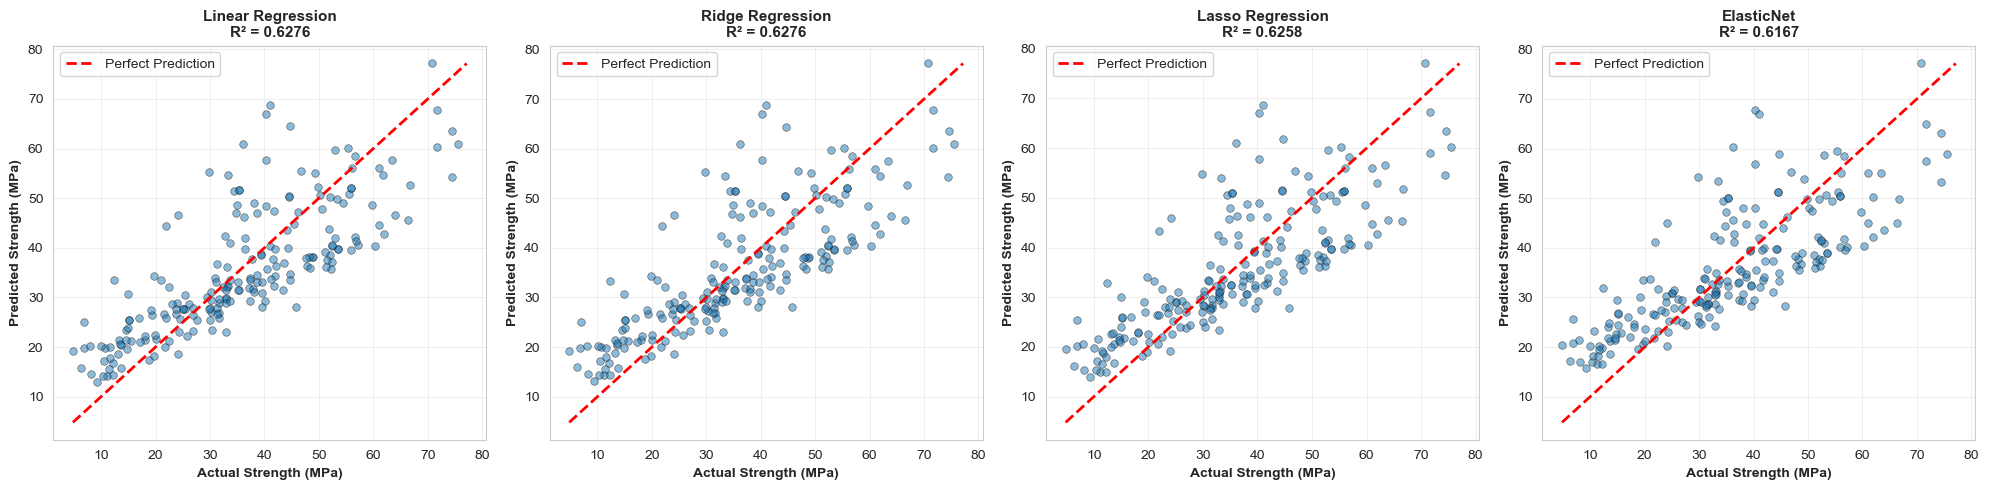

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for idx, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[idx]
    ax.scatter(y_test, y_pred, alpha=0.5, s=30, edgecolors='k', linewidth=0.5)
    
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    ax.set_xlabel('Actual Strength (MPa)', fontsize=10, fontweight='bold')
    ax.set_ylabel('Predicted Strength (MPa)', fontsize=10, fontweight='bold')
    ax.set_title(f'{name}\nR² = {results_df[results_df["Model"]==name]["R²"].values[0]:.4f}', 
                 fontsize=11, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Residual Analysis

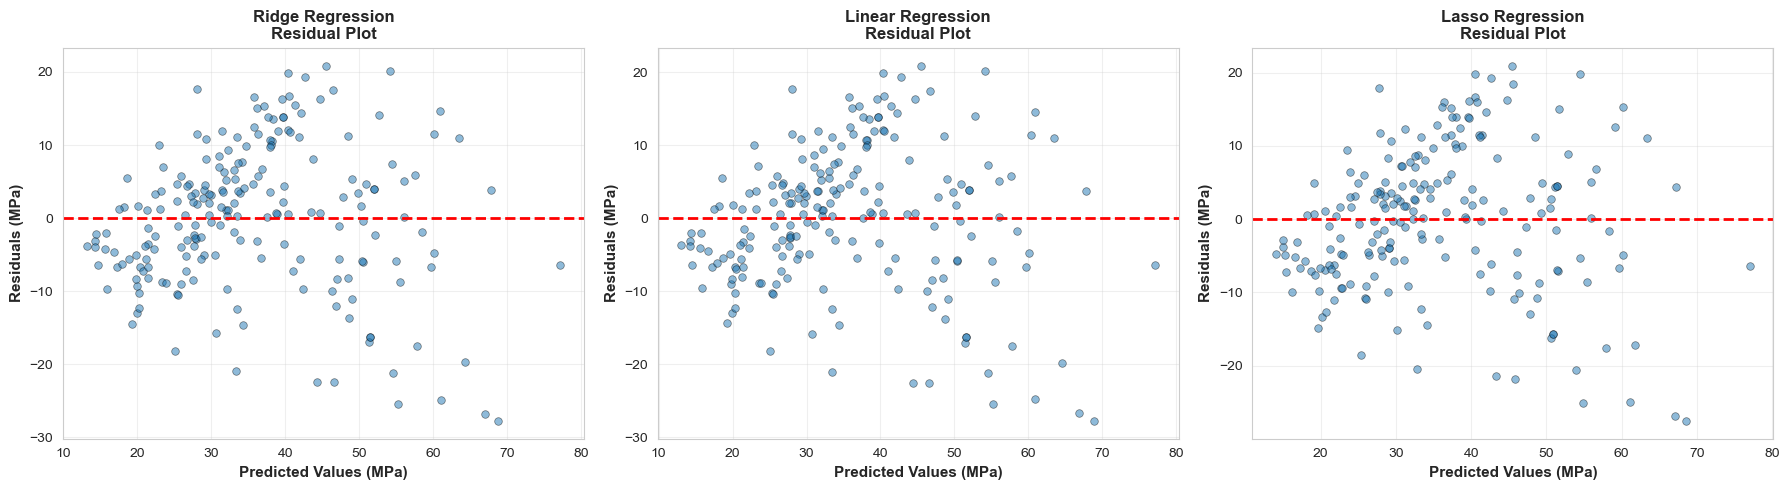

In [26]:
top_models = results_df.head(3)['Model'].tolist()
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, model_name in enumerate(top_models):
    ax = axes[idx]
    y_pred = predictions[model_name]
    residuals = y_test - y_pred
    
    ax.scatter(y_pred, residuals, alpha=0.5, s=30, edgecolors='k', linewidth=0.5)
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Values (MPa)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Residuals (MPa)', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}\nResidual Plot', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Coefficients Analysis (for Linear Models)

COEFFICIENTS FOR LINEAR MODELS (Standardized)
                    Linear Regression  Ridge Regression  Lasso Regression  ElasticNet
Cement                      12.788413         12.561513         10.718312    8.665248
Blast_Furnace_Slag           9.434456          9.215070          7.396670    5.461517
Fly_Ash                      5.254578          5.060486          3.448045    1.686941
Water                       -2.882597         -3.029577         -4.235677   -4.706205
Superplasticizer             1.852126          1.853707          1.799018    2.292318
Coarse_Aggregate             1.405196          1.253471         -0.000000   -0.869732
Fine_Aggregate               1.950529          1.754910          0.075828   -1.113663
Age                          7.037434          7.018491          6.812497    6.399851


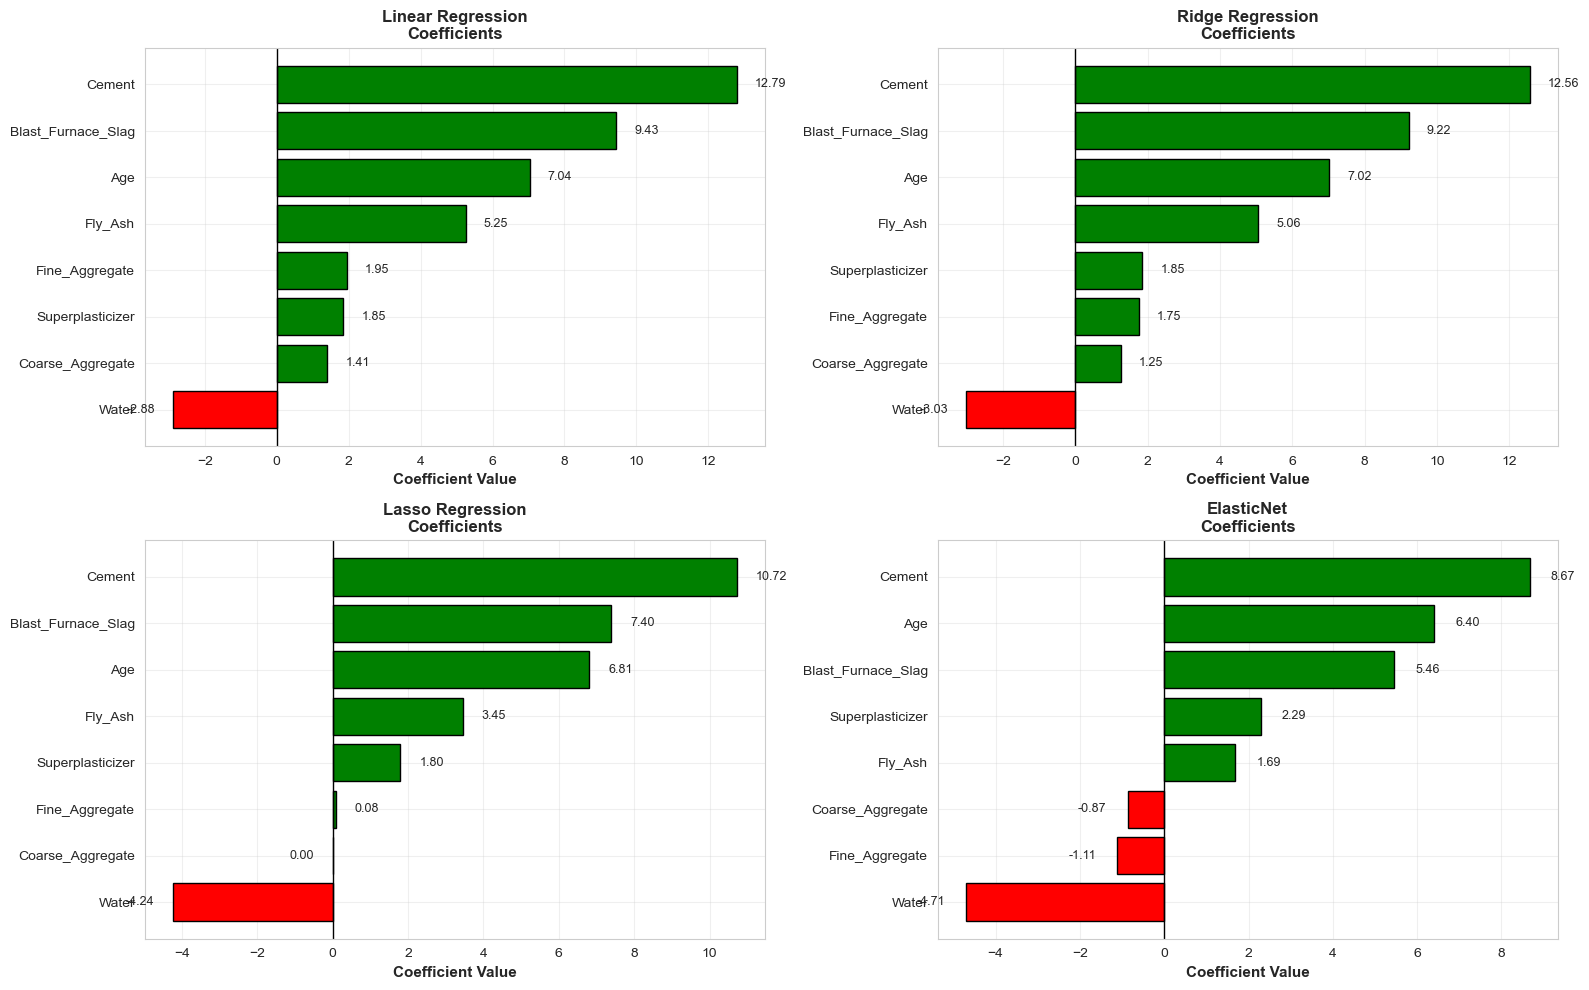

In [27]:
linear_models_list = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet']

coef_data = []
for model_name in linear_models_list:
    model = trained_models[model_name]
    coef_data.append(model.coef_)

coef_df = pd.DataFrame(coef_data, columns=X.columns, index=linear_models_list)

print("=" * 100)
print("COEFFICIENTS FOR LINEAR MODELS (Standardized)")
print("=" * 100)
print(coef_df.T.to_string())
print("=" * 100)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, model_name in enumerate(linear_models_list):
    ax = axes[idx]
    coefs = coef_df.loc[model_name].sort_values()
    colors = ['red' if x < 0 else 'green' for x in coefs]
    
    bars = ax.barh(coefs.index, coefs.values, color=colors, edgecolor='black')
    ax.set_xlabel('Coefficient Value', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}\nCoefficients', fontsize=12, fontweight='bold')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.grid(True, alpha=0.3)
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        offset = 0.5 if width > 0 else -0.5
        ax.text(width + offset, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}', ha='left' if width > 0 else 'right', 
                va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 9. Interpretation of Results

### 9.1 Model Performance Comparison

In [28]:
print("=" * 100)
print("COMPREHENSIVE MODEL INTERPRETATION")
print("=" * 100)

best_model = results_df.iloc[0]
worst_model = results_df.iloc[-1]

print("\n PERFORMANCE RANKING:")
print("-" * 100)
for i, row in results_df.iterrows():
    print(f"{i+1}. {row['Model']:<25} | R²: {row['R²']:.4f} | RMSE: {row['RMSE']:.3f} | MAE: {row['MAE']:.3f}")

print("\n\n BEST MODEL ANALYSIS:")
print("-" * 100)
print(f"Model: {best_model['Model']}")
print(f"  • R² Score: {best_model['R²']:.4f}")
print(f"    → Explains {best_model['R²']*100:.2f}% of variance in concrete strength")
print(f"  • RMSE: {best_model['RMSE']:.3f} MPa")
print(f"    → Average prediction error magnitude")
print(f"  • MAE: {best_model['MAE']:.3f} MPa")
print(f"    → Average absolute prediction error")
print(f"  • MAPE: {best_model['MAPE (%)']:.2f}%")
print(f"    → Average percentage error in predictions")

print("\n\n WORST MODEL ANALYSIS:")
print("-" * 100)
print(f"Model: {worst_model['Model']}")
print(f"  • R² Score: {worst_model['R²']:.4f}")
print(f"    → Explains only {worst_model['R²']*100:.2f}% of variance")
print(f"  • RMSE: {worst_model['RMSE']:.3f} MPa")
print(f"  • MAE: {worst_model['MAE']:.3f} MPa")

# Model category comparison
print("\n\n MODEL TYPE COMPARISON:")
print("-" * 100)
linear_models_list = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet']
linear_avg_r2 = results_df[results_df['Model'].isin(linear_models_list)]['R²'].mean()

print(f"Linear Models Average R²: {linear_avg_r2:.4f}")
print("\n✓ All models are linear regression variants:")
print("  - Linear relationships are well-captured")
print("  - Regularization techniques help prevent overfitting")
print("  - Simpler model structure provides good interpretability")

print("\n" + "=" * 100)

COMPREHENSIVE MODEL INTERPRETATION

 PERFORMANCE RANKING:
----------------------------------------------------------------------------------------------------
1. Ridge Regression          | R²: 0.6276 | RMSE: 9.796 | MAE: 7.752
2. Linear Regression         | R²: 0.6276 | RMSE: 9.796 | MAE: 7.746
3. Lasso Regression          | R²: 0.6258 | RMSE: 9.819 | MAE: 7.823
4. ElasticNet                | R²: 0.6167 | RMSE: 9.938 | MAE: 8.023


 BEST MODEL ANALYSIS:
----------------------------------------------------------------------------------------------------
Model: Ridge Regression
  • R² Score: 0.6276
    → Explains 62.76% of variance in concrete strength
  • RMSE: 9.796 MPa
    → Average prediction error magnitude
  • MAE: 7.752 MPa
    → Average absolute prediction error
  • MAPE: 29.34%
    → Average percentage error in predictions


 WORST MODEL ANALYSIS:
----------------------------------------------------------------------------------------------------
Model: ElasticNet
  • R² Score:

### 9.2 Coefficient and Feature Importance Interpretation

In [29]:
print("=" * 100)
print("FEATURE IMPACT INTERPRETATION")
print("=" * 100)

lr_model = trained_models['Linear Regression']
lr_coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', ascending=False)

print("\nLINEAR REGRESSION COEFFICIENTS INTERPRETATION:")
print("-" * 100)

for _, row in lr_coefs.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    direction = "INCREASES" if coef > 0 else "DECREASES"
    
    print(f"{feature}:")
    print(f"  Coefficient: {coef:+.4f}")
    print(f"  One standard deviation increase in {feature} {direction} strength by {abs(coef):.4f} std units")
    print()

print("\n\nKEY INSIGHTS FROM FEATURE ANALYSIS:")
print("-" * 100)

# Top 3 most influential features by absolute coefficient
lr_coefs['Abs_Coef'] = lr_coefs['Coefficient'].abs()
top_3_features = lr_coefs.nlargest(3, 'Abs_Coef')['Feature'].tolist()
print(f"Top 3 Most Influential Features: {', '.join(top_3_features)}")

positive_coefs = lr_coefs[lr_coefs['Coefficient'] > 0]
negative_coefs = lr_coefs[lr_coefs['Coefficient'] < 0]

print(f"\nFeatures with POSITIVE impact on strength ({len(positive_coefs)}):")
for _, row in positive_coefs.iterrows():
    print(f"  {row['Feature']} ({row['Coefficient']:+.4f})")

print(f"\nFeatures with NEGATIVE impact on strength ({len(negative_coefs)}):")
for _, row in negative_coefs.iterrows():
    print(f"  {row['Feature']} ({row['Coefficient']:+.4f})")

print("\n" + "=" * 100)

FEATURE IMPACT INTERPRETATION

LINEAR REGRESSION COEFFICIENTS INTERPRETATION:
----------------------------------------------------------------------------------------------------
Cement:
  Coefficient: +12.7884
  One standard deviation increase in Cement INCREASES strength by 12.7884 std units

Blast_Furnace_Slag:
  Coefficient: +9.4345
  One standard deviation increase in Blast_Furnace_Slag INCREASES strength by 9.4345 std units

Age:
  Coefficient: +7.0374
  One standard deviation increase in Age INCREASES strength by 7.0374 std units

Fly_Ash:
  Coefficient: +5.2546
  One standard deviation increase in Fly_Ash INCREASES strength by 5.2546 std units

Fine_Aggregate:
  Coefficient: +1.9505
  One standard deviation increase in Fine_Aggregate INCREASES strength by 1.9505 std units

Superplasticizer:
  Coefficient: +1.8521
  One standard deviation increase in Superplasticizer INCREASES strength by 1.8521 std units

Coarse_Aggregate:
  Coefficient: +1.4052
  One standard deviation increas

### 9.3 Model Quality Assessment

In [30]:
print("=" * 100)
print("MODEL QUALITY ASSESSMENT")
print("=" * 100)

for _, row in results_df.iterrows():
    model_name = row['Model']
    r2 = row['R²']
    rmse = row['RMSE']
    mape = row['MAPE (%)']
    
    print(f"\n{'='*50}")
    print(f"MODEL: {model_name}")
    print(f"{'='*50}")
    
    # R² interpretation
    print(f"\n1. R² Score: {r2:.4f}")
    if r2 >= 0.9:
        quality = "EXCELLENT"
        interpretation = "Model explains >90% of variance - very strong predictive power"
    elif r2 >= 0.8:
        quality = "GOOD"
        interpretation = "Model explains 80-90% of variance - strong predictive power"
    elif r2 >= 0.7:
        quality = "MODERATE"
        interpretation = "Model explains 70-80% of variance - acceptable predictive power"
    elif r2 >= 0.5:
        quality = "FAIR"
        interpretation = "Model explains 50-70% of variance - limited predictive power"
    else:
        quality = "POOR"
        interpretation = "Model explains <50% of variance - weak predictive power"
    
    print(f"   Quality: {quality}")
    print(f"   → {interpretation}")
    
    # RMSE interpretation
    print(f"\n2. RMSE: {rmse:.3f} MPa")
    avg_strength = y_test.mean()
    rmse_percentage = (rmse / avg_strength) * 100
    print(f"   → Average prediction error: {rmse:.3f} MPa ({rmse_percentage:.2f}% of mean strength)")
    
    if rmse_percentage < 10:
        print(f"   → Error is <10% of mean - HIGH PRECISION")
    elif rmse_percentage < 15:
        print(f"   → Error is 10-15% of mean - GOOD PRECISION")
    elif rmse_percentage < 20:
        print(f"   → Error is 15-20% of mean - MODERATE PRECISION")
    else:
        print(f"   → Error is >20% of mean - LOW PRECISION")
    
    # MAPE interpretation
    print(f"\n3. MAPE: {mape:.2f}%")
    if mape < 10:
        print(f"   → Highly accurate forecasting")
    elif mape < 20:
        print(f"   → Good forecasting")
    elif mape < 30:
        print(f"   → Reasonable forecasting")
    else:
        print(f"   → Inaccurate forecasting")

print("\n" + "=" * 100)

MODEL QUALITY ASSESSMENT

MODEL: Ridge Regression

1. R² Score: 0.6276
   Quality: FAIR
   → Model explains 50-70% of variance - limited predictive power

2. RMSE: 9.796 MPa
   → Average prediction error: 9.796 MPa (27.47% of mean strength)
   → Error is >20% of mean - LOW PRECISION

3. MAPE: 29.34%
   → Reasonable forecasting

MODEL: Linear Regression

1. R² Score: 0.6276
   Quality: FAIR
   → Model explains 50-70% of variance - limited predictive power

2. RMSE: 9.796 MPa
   → Average prediction error: 9.796 MPa (27.47% of mean strength)
   → Error is >20% of mean - LOW PRECISION

3. MAPE: 29.27%
   → Reasonable forecasting

MODEL: Lasso Regression

1. R² Score: 0.6258
   Quality: FAIR
   → Model explains 50-70% of variance - limited predictive power

2. RMSE: 9.819 MPa
   → Average prediction error: 9.819 MPa (27.54% of mean strength)
   → Error is >20% of mean - LOW PRECISION

3. MAPE: 29.96%
   → Reasonable forecasting

MODEL: ElasticNet

1. R² Score: 0.6167
   Quality: FAIR
   → 

## 10. Interactive Prediction Application

### 10.1 Setup Prediction Function

In [31]:
# Select the best model for the application
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

# All models are linear models (need scaling)
linear_models_list = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet']
is_linear_model = True

print(f" Selected Model for Application: {best_model_name}")
print(f"   R² Score: {results_df.iloc[0]['R²']:.4f}")
print(f"   RMSE: {results_df.iloc[0]['RMSE']:.3f} MPa")
print(f"   MAE: {results_df.iloc[0]['MAE']:.3f} MPa")

# Define prediction function
def predict_concrete_strength(cement, blast_furnace_slag, fly_ash, water, 
                               superplasticizer, coarse_aggregate, fine_aggregate, age):
    """
    Predict concrete compressive strength based on mixture components and age.
    
    Parameters:
    -----------
    All parameters in kg/m³ except Age (in days)
    
    Returns:
    --------
    Predicted compressive strength in MPa
    """
    # Create input array
    input_data = np.array([[cement, blast_furnace_slag, fly_ash, water,
                            superplasticizer, coarse_aggregate, fine_aggregate, age]])
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)
    prediction = best_model.predict(input_data_scaled)[0]
    
    return prediction


 Selected Model for Application: Ridge Regression
   R² Score: 0.6276
   RMSE: 9.796 MPa
   MAE: 7.752 MPa


### 10.2 Interactive Widget Interface (using ipywidgets)

In [32]:
try:
    import ipywidgets as widgets
    from IPython.display import display, HTML, clear_output
except ImportError:
    import sys
    !{sys.executable} -m pip install ipywidgets
    import ipywidgets as widgets
    from IPython.display import display, HTML, clear_output

In [33]:
print("=" * 100)
print("CONCRETE STRENGTH PREDICTION APPLICATION")
print("=" * 100)
print(f"Model: {best_model_name} | R² = {results_df.iloc[0]['R²']:.4f} | RMSE = {results_df.iloc[0]['RMSE']:.2f} MPa")
print("=" * 100)

cement_slider = widgets.FloatSlider(
    value=300, min=100, max=550, step=10,
    description='Cement (kg/m³):', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

slag_slider = widgets.FloatSlider(
    value=80, min=0, max=350, step=10,
    description='Blast Furnace Slag (kg/m³):', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

flyash_slider = widgets.FloatSlider(
    value=0, min=0, max=200, step=10,
    description='Fly Ash (kg/m³):', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

water_slider = widgets.FloatSlider(
    value=180, min=120, max=250, step=5,
    description='Water (kg/m³):', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

super_slider = widgets.FloatSlider(
    value=5, min=0, max=30, step=0.5,
    description='Superplasticizer (kg/m³):', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

coarse_slider = widgets.FloatSlider(
    value=1000, min=800, max=1150, step=10,
    description='Coarse Aggregate (kg/m³):', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

fine_slider = widgets.FloatSlider(
    value=750, min=550, max=1000, step=10,
    description='Fine Aggregate (kg/m³):', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

age_slider = widgets.IntSlider(
    value=28, min=1, max=365, step=1,
    description='Age (days):', style={'description_width': '180px'}, layout=widgets.Layout(width='600px')
)

# Output widget
output_widget = widgets.Output()

# Prediction button
predict_button = widgets.Button(
    description='🔮 Predict Strength',
    button_style='success',
    layout=widgets.Layout(width='200px', height='40px'),
    style={'font_weight': 'bold'}
)

# Reset button
reset_button = widgets.Button(
    description='🔄 Reset to Default',
    button_style='warning',
    layout=widgets.Layout(width='200px', height='40px')
)

def on_predict_click(b):
    with output_widget:
        clear_output(wait=True)
        
        # Get values
        cement = cement_slider.value
        slag = slag_slider.value
        flyash = flyash_slider.value
        water = water_slider.value
        superplast = super_slider.value
        coarse = coarse_slider.value
        fine = fine_slider.value
        age = age_slider.value
        
        # Make prediction
        strength = predict_concrete_strength(cement, slag, flyash, water, 
                                            superplast, coarse, fine, age)
        
        # Display result with visualization
        print("=" * 80)
        print("📊 PREDICTION RESULTS")
        print("=" * 80)
        print(f"\n🎯 Predicted Concrete Compressive Strength: {strength:.2f} MPa")
        print(f"\n📋 Input Summary:")
        print(f"   • Cement: {cement:.1f} kg/m³")
        print(f"   • Blast Furnace Slag: {slag:.1f} kg/m³")
        print(f"   • Fly Ash: {flyash:.1f} kg/m³")
        print(f"   • Water: {water:.1f} kg/m³")
        print(f"   • Superplasticizer: {superplast:.1f} kg/m³")
        print(f"   • Coarse Aggregate: {coarse:.1f} kg/m³")
        print(f"   • Fine Aggregate: {fine:.1f} kg/m³")
        print(f"   • Age: {age} days")
        
        print(f"\nStrength Classification:")
        if strength < 20:
            classification = "Low Strength"
        elif strength < 40:
            classification = "Medium Strength"
        elif strength < 60:
            classification = "High Strength"
        else:
            classification = "Very High Strength"
        
        print(f"   {classification}")
        
        print(f"\nModel Performance Metrics:")
        print(f"   R² Score: {results_df.iloc[0]['R²']:.4f}")
        print(f"   RMSE: ±{results_df.iloc[0]['RMSE']:.2f} MPa")
        print(f"   MAE: ±{results_df.iloc[0]['MAE']:.2f} MPa")
        print("=" * 80)
        
        # Create visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        # Gauge chart
        categories = ['Low\n(<20)', 'Medium\n(20-40)', 'High\n(40-60)', 'Very High\n(>60)']
        colors_chart = ['red', 'yellow', 'green', 'blue']
        ax1.barh(categories, [20, 20, 20, 40], color=colors_chart, alpha=0.3, edgecolor='black')
        
        # Add prediction line
        ax1.axvline(x=strength, color='black', linewidth=3, linestyle='--', label=f'Prediction: {strength:.2f} MPa')
        ax1.set_xlabel('Strength (MPa)', fontsize=12, fontweight='bold')
        ax1.set_title('Strength Classification', fontsize=13, fontweight='bold')
        ax1.legend()
        ax1.set_xlim(0, 100)
        
        # Component contribution visualization
        components = ['Cement', 'Slag', 'Fly Ash', 'Water', 'Super', 'Coarse', 'Fine', 'Age']
        values = [cement, slag, flyash, water, superplast, coarse, fine, age]
        
        # Normalize for visualization
        normalized_values = [v / max(v, 1) * 100 for v in values]
        
        ax2.barh(components, normalized_values, color='steelblue', edgecolor='navy')
        ax2.set_xlabel('Normalized Value (%)', fontsize=12, fontweight='bold')
        ax2.set_title('Input Components (Normalized)', fontsize=13, fontweight='bold')
        ax2.set_xlim(0, 100)
        
        plt.tight_layout()
        plt.show()

def on_reset_click(b):
    cement_slider.value = 300
    slag_slider.value = 80
    flyash_slider.value = 0
    water_slider.value = 180
    super_slider.value = 5
    coarse_slider.value = 1000
    fine_slider.value = 750
    age_slider.value = 28
    with output_widget:
        clear_output()
        print("Reset to default values. Click 'Predict Strength' to see results.")

predict_button.on_click(on_predict_click)
reset_button.on_click(on_reset_click)

display(HTML("<h3>Input Parameters:</h3>"))
display(cement_slider, slag_slider, flyash_slider, water_slider, 
        super_slider, coarse_slider, fine_slider, age_slider)
display(HTML("<br>"))
display(widgets.HBox([predict_button, reset_button]))
display(HTML("<br>"))
display(output_widget)

CONCRETE STRENGTH PREDICTION APPLICATION
Model: Ridge Regression | R² = 0.6276 | RMSE = 9.80 MPa


FloatSlider(value=300.0, description='Cement (kg/m³):', layout=Layout(width='600px'), max=550.0, min=100.0, st…

FloatSlider(value=80.0, description='Blast Furnace Slag (kg/m³):', layout=Layout(width='600px'), max=350.0, st…

FloatSlider(value=0.0, description='Fly Ash (kg/m³):', layout=Layout(width='600px'), max=200.0, step=10.0, sty…

FloatSlider(value=180.0, description='Water (kg/m³):', layout=Layout(width='600px'), max=250.0, min=120.0, ste…

FloatSlider(value=5.0, description='Superplasticizer (kg/m³):', layout=Layout(width='600px'), max=30.0, step=0…

FloatSlider(value=1000.0, description='Coarse Aggregate (kg/m³):', layout=Layout(width='600px'), max=1150.0, m…

FloatSlider(value=750.0, description='Fine Aggregate (kg/m³):', layout=Layout(width='600px'), max=1000.0, min=…

IntSlider(value=28, description='Age (days):', layout=Layout(width='600px'), max=365, min=1, style=SliderStyle…

Output()

### 10.3 Feature Sensitivity Analysis Dashboard

In [34]:
print("=" * 100)
print("FEATURE SENSITIVITY ANALYSIS - How each feature affects concrete strength")
print("=" * 100)

# Dropdown to select feature
feature_dropdown = widgets.Dropdown(
    options=['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 
             'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age'],
    value='Cement',
    description='Select Feature:',
    style={'description_width': '120px'}
)

# Output for sensitivity plot
sensitivity_output = widgets.Output()

def analyze_sensitivity(feature_name):
    with sensitivity_output:
        clear_output(wait=True)
        
        # Base values (median from training data)
        base_values = {
            'Cement': 280,
            'Blast_Furnace_Slag': 73,
            'Fly_Ash': 0,
            'Water': 185,
            'Superplasticizer': 6,
            'Coarse_Aggregate': 968,
            'Fine_Aggregate': 774,
            'Age': 28
        }
        
        # Get range for selected feature
        feature_ranges = {
            'Cement': np.linspace(100, 550, 50),
            'Blast_Furnace_Slag': np.linspace(0, 350, 50),
            'Fly_Ash': np.linspace(0, 200, 50),
            'Water': np.linspace(120, 250, 50),
            'Superplasticizer': np.linspace(0, 30, 50),
            'Coarse_Aggregate': np.linspace(800, 1150, 50),
            'Fine_Aggregate': np.linspace(550, 1000, 50),
            'Age': np.linspace(1, 365, 50)
        }
        
        feature_range = feature_ranges[feature_name]
        predictions = []
        
        # Vary selected feature while keeping others constant
        for value in feature_range:
            input_vals = base_values.copy()
            input_vals[feature_name] = value
            
            pred = predict_concrete_strength(
                input_vals['Cement'],
                input_vals['Blast_Furnace_Slag'],
                input_vals['Fly_Ash'],
                input_vals['Water'],
                input_vals['Superplasticizer'],
                input_vals['Coarse_Aggregate'],
                input_vals['Fine_Aggregate'],
                input_vals['Age']
            )
            predictions.append(pred)
        
        # Plot
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(feature_range, predictions, linewidth=3, color='darkblue', marker='o', markersize=4)
        ax.set_xlabel(f'{feature_name} ({"days" if feature_name == "Age" else "kg/m³"})', 
                     fontsize=13, fontweight='bold')
        ax.set_ylabel('Predicted Concrete Strength (MPa)', fontsize=13, fontweight='bold')
        ax.set_title(f'Sensitivity Analysis: Impact of {feature_name} on Concrete Strength', 
                    fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        # Add baseline marker
        base_pred = predictions[len(predictions)//2]
        ax.axhline(y=base_pred, color='red', linestyle='--', alpha=0.5, 
                  label=f'Baseline: {base_pred:.2f} MPa')
        ax.legend()
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nSensitivity Statistics for {feature_name}:")
        print(f"   Min Predicted Strength: {min(predictions):.2f} MPa")
        print(f"   Max Predicted Strength: {max(predictions):.2f} MPa")
        print(f"   Range of Impact: {max(predictions) - min(predictions):.2f} MPa")
        print(f"   Baseline Strength: {base_pred:.2f} MPa")
        
        if predictions[-1] > predictions[0]:
            trend = "INCREASES"
        else:
            trend = "DECREASES"
        
        print(f"\nTrend: Concrete strength {trend} as {feature_name} increases")

def on_feature_change(change):
    analyze_sensitivity(change['new'])

feature_dropdown.observe(on_feature_change, names='value')

display(HTML("<h3>Interactive Sensitivity Analysis:</h3>"))
display(HTML("<p>Select a feature to see how it affects concrete strength (other features held constant)</p>"))
display(feature_dropdown)
display(sensitivity_output)

analyze_sensitivity('Cement')

FEATURE SENSITIVITY ANALYSIS - How each feature affects concrete strength


Dropdown(description='Select Feature:', options=('Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superpla…

Output()

### 10.4 Model Performance Dashboard

MODEL PERFORMANCE DASHBOARD


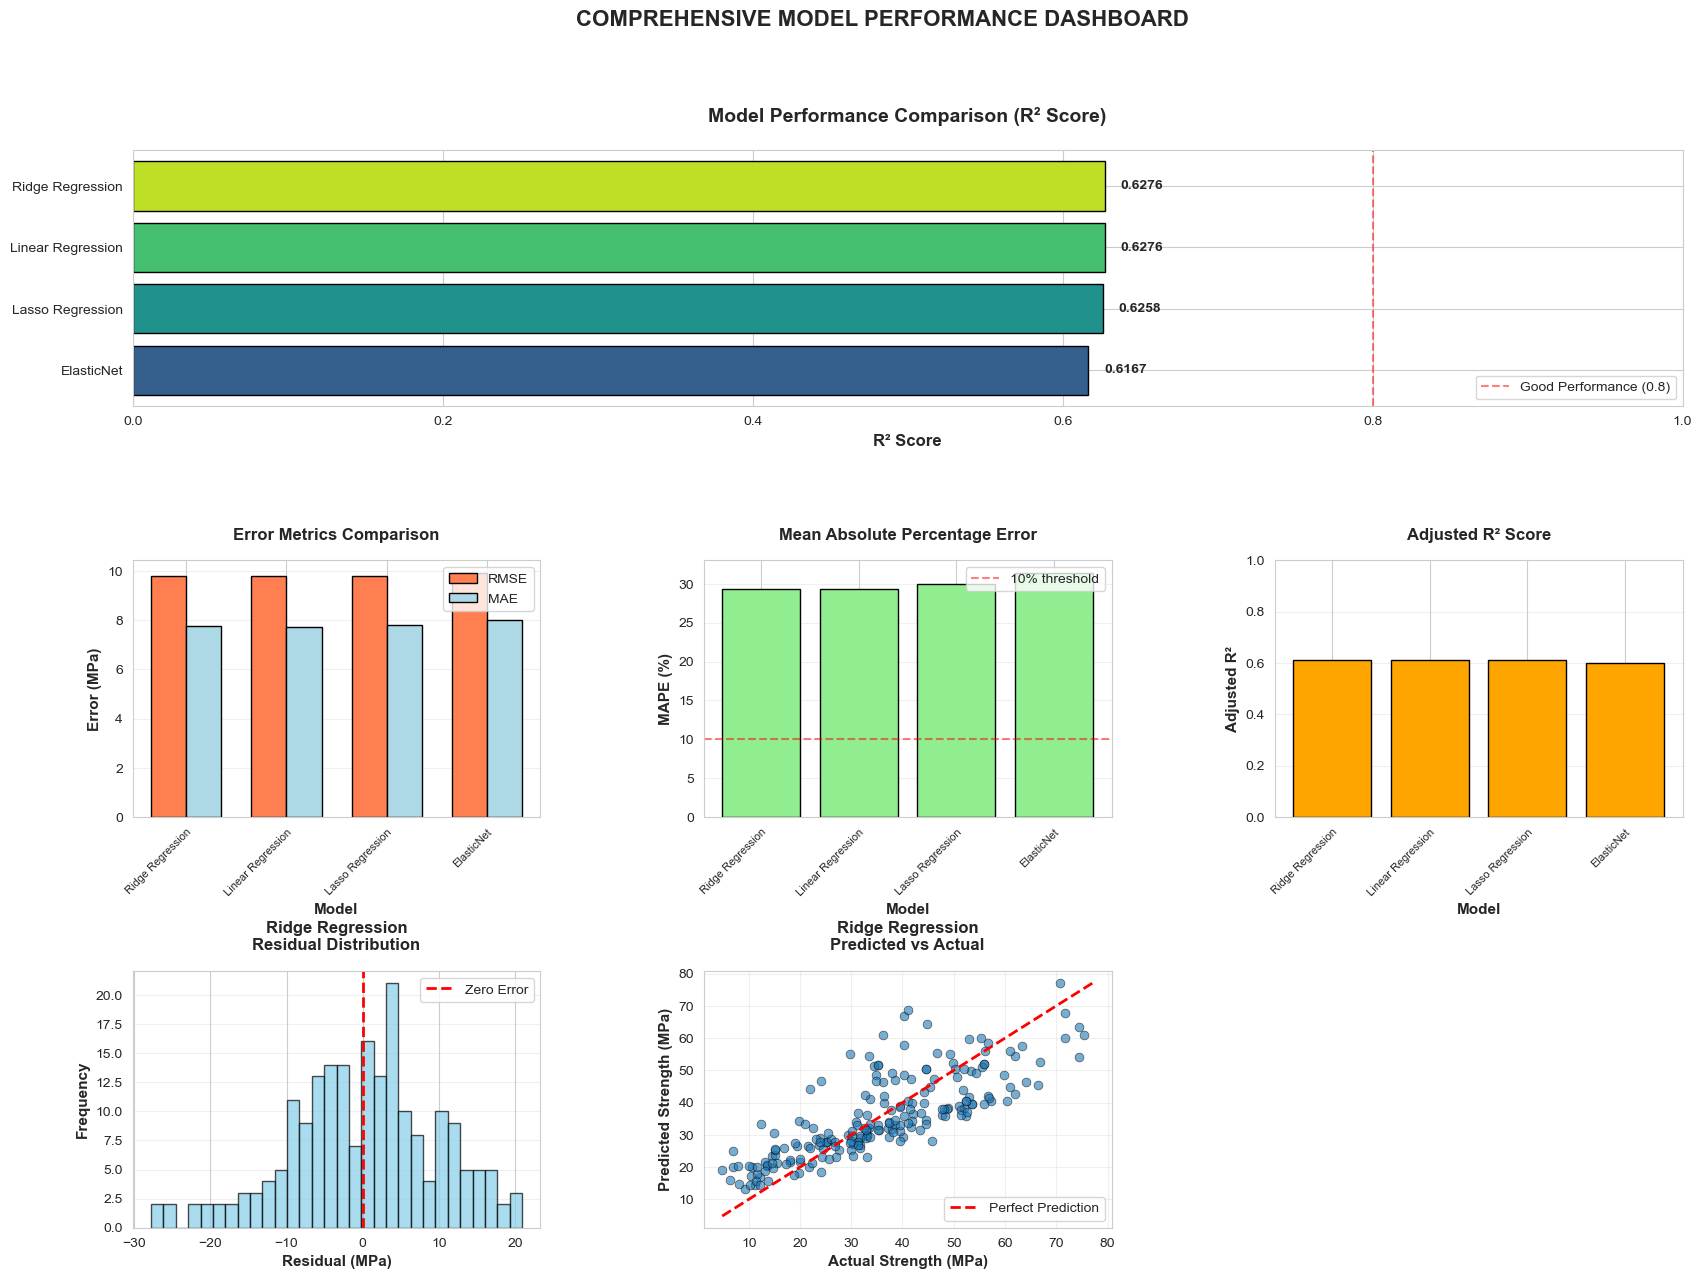


Recommended Model for Production: Ridge Regression


In [35]:
print("=" * 100)
print("MODEL PERFORMANCE DASHBOARD")
print("=" * 100)

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.6, wspace=0.4)

# 1. Model Comparison - R² Score
ax1 = fig.add_subplot(gs[0, :])
sorted_models = results_df.sort_values('R²', ascending=True)
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(sorted_models)))
bars = ax1.barh(sorted_models['Model'], sorted_models['R²'], color=colors_gradient, edgecolor='black')
ax1.set_xlabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance Comparison (R² Score)', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlim(0, 1)
ax1.axvline(x=0.8, color='red', linestyle='--', alpha=0.5, label='Good Performance (0.8)')
ax1.legend(loc='lower right')
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=10, fontweight='bold')

# 2. Error Distribution - RMSE and MAE
ax2 = fig.add_subplot(gs[1, 0])
x_pos = np.arange(len(results_df))
bar_width = 0.35
ax2.bar(x_pos - bar_width/2, results_df['RMSE'], bar_width, label='RMSE', color='coral', edgecolor='black')
ax2.bar(x_pos + bar_width/2, results_df['MAE'], bar_width, label='MAE', color='lightblue', edgecolor='black')
ax2.set_xlabel('Model', fontsize=11, fontweight='bold')
ax2.set_ylabel('Error (MPa)', fontsize=11, fontweight='bold')
ax2.set_title('Error Metrics Comparison', fontsize=12, fontweight='bold', pad=15)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=8)
ax2.legend(loc='upper right')
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# 3. MAPE Distribution
ax3 = fig.add_subplot(gs[1, 1])
ax3.bar(results_df['Model'], results_df['MAPE (%)'], color='lightgreen', edgecolor='black')
ax3.set_xlabel('Model', fontsize=11, fontweight='bold')
ax3.set_ylabel('MAPE (%)', fontsize=11, fontweight='bold')
ax3.set_title('Mean Absolute Percentage Error', fontsize=12, fontweight='bold', pad=15)
ax3.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=8)
ax3.axhline(y=10, color='red', linestyle='--', alpha=0.5, label='10% threshold')
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# 4. Adjusted R²
ax4 = fig.add_subplot(gs[1, 2])
colors_r2 = ['green' if x >= 0.8 else 'orange' if x >= 0.6 else 'red' 
             for x in results_df['Adjusted R²']]
ax4.bar(results_df['Model'], results_df['Adjusted R²'], color=colors_r2, edgecolor='black')
ax4.set_xlabel('Model', fontsize=11, fontweight='bold')
ax4.set_ylabel('Adjusted R²', fontsize=11, fontweight='bold')
ax4.set_title('Adjusted R² Score', fontsize=12, fontweight='bold', pad=15)
ax4.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=8)
ax4.set_ylim(0, 1)
ax4.grid(axis='y', alpha=0.3)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# 5. Best Model Prediction Distribution (dời xuống hàng 3, cột 1)
ax5 = fig.add_subplot(gs[2, 0])
best_pred = predictions[best_model_name]
residuals_best = y_test - best_pred
ax5.hist(residuals_best, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax5.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax5.set_xlabel('Residual (MPa)', fontsize=11, fontweight='bold')
ax5.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax5.set_title(f'{best_model_name}\nResidual Distribution', fontsize=12, fontweight='bold', pad=15)
ax5.legend(loc='upper right')
ax5.grid(axis='y', alpha=0.3)

# 6. Prediction Accuracy (dời xuống hàng 3, cột 2)
ax6 = fig.add_subplot(gs[2, 1])
best_pred = predictions[best_model_name]
ax6.scatter(y_test, best_pred, alpha=0.6, edgecolors='k', linewidth=0.5, s=40)
min_val = min(y_test.min(), best_pred.min())
max_val = max(y_test.max(), best_pred.max())
ax6.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax6.set_xlabel('Actual Strength (MPa)', fontsize=11, fontweight='bold')
ax6.set_ylabel('Predicted Strength (MPa)', fontsize=11, fontweight='bold')
ax6.set_title(f'{best_model_name}\nPredicted vs Actual', fontsize=12, fontweight='bold', pad=15)
ax6.legend(loc='lower right')
ax6.grid(True, alpha=0.3)

plt.suptitle('COMPREHENSIVE MODEL PERFORMANCE DASHBOARD', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

print(f"\nRecommended Model for Production: {best_model_name}")

## 11. Summary and Conclusions

In [36]:
print("=" * 100)
print(" PROJECT SUMMARY AND CONCLUSIONS")
print("=" * 100)

print("\n PROJECT OVERVIEW:")
print("-" * 100)
print(f"• Dataset: Concrete Compressive Strength")
print(f"• Total Samples: {len(df)}")
print(f"• Features: {X.shape[1]} (mixture components + age)")
print(f"• Target: Compressive Strength (MPa)")
print(f"• Models Evaluated: {len(models)}")

print("\n\n MODEL PERFORMANCE RANKING:")
print("-" * 100)
for i, row in results_df.iterrows():
    medal = "" if i == 0 else "" if i == 1 else "" if i == 2 else "  "
    print(f"{medal} {i+1}. {row['Model']:<25} | R²={row['R²']:.4f} | RMSE={row['RMSE']:.2f} | MAE={row['MAE']:.2f}")

print("\n\nKEY FINDINGS:")
print("-" * 100)

best = results_df.iloc[0]
worst = results_df.iloc[-1]

print(f"\n1. BEST PERFORMING MODEL:")
print(f"   Model: {best['Model']}")
print(f"   R² Score: {best['R²']:.4f}")
print(f"   RMSE: {best['RMSE']:.3f} MPa")

print(f"\n2. MODEL TYPE COMPARISON:")
linear_r2 = results_df['R²'].mean()
print(f"   Linear Models Average R²: {linear_r2:.4f}")
print(f"   All models are linear regression variants")

print(f"\n3. FEATURE IMPORTANCE:")
lr_model = trained_models['Linear Regression']
coefs = lr_model.coef_
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefs,
    'Abs_Coef': np.abs(coefs)
}).sort_values('Abs_Coef', ascending=False)

print(f"   Top 3 Features:")
for i, (_, row) in enumerate(coef_df.head(3).iterrows(), 1):
    print(f"      {i}. {row['Feature']}: {row['Coefficient']:+.4f}")

print(f"\n4. MODEL RELIABILITY:")
print(f"   RMSE: {best['RMSE']:.3f} MPa")
print(f"   MAE: {best['MAE']:.3f} MPa")
print(f"   MAPE: {best['MAPE (%)']:.2f}%")

print(f"\n5. FEATURE CORRELATIONS:")
correlations = df.corr()['Strength'].sort_values(ascending=False)
for feature, corr in correlations.items():
    if feature != 'Strength':
        print(f"   {feature}: {corr:+.3f}")

print("\n" + "=" * 100)

 PROJECT SUMMARY AND CONCLUSIONS

 PROJECT OVERVIEW:
----------------------------------------------------------------------------------------------------
• Dataset: Concrete Compressive Strength
• Total Samples: 1030
• Features: 8 (mixture components + age)
• Target: Compressive Strength (MPa)
• Models Evaluated: 4


 MODEL PERFORMANCE RANKING:
----------------------------------------------------------------------------------------------------
 1. Ridge Regression          | R²=0.6276 | RMSE=9.80 | MAE=7.75
 2. Linear Regression         | R²=0.6276 | RMSE=9.80 | MAE=7.75
 3. Lasso Regression          | R²=0.6258 | RMSE=9.82 | MAE=7.82
   4. ElasticNet                | R²=0.6167 | RMSE=9.94 | MAE=8.02


KEY FINDINGS:
----------------------------------------------------------------------------------------------------

1. BEST PERFORMING MODEL:
   Model: Ridge Regression
   R² Score: 0.6276
   RMSE: 9.796 MPa

2. MODEL TYPE COMPARISON:
   Linear Models Average R²: 0.6244
   All models are